# **Project 3**, APS1070 Summer 2023
#### **PCA [10 marks]**
**Deadline: Jul 2nd, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

In this project we work on a Covid-19 dataset that reports the vaccination cases for different US cities at the end of each day.

In [22]:
%%shell

jupyter nbconvert --to html /content/S23_APS1070_Project_3.ipynb

[NbConvertApp] WARNING | pattern '/content/S23_APS1070_Project_3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=

CalledProcessError: ignored

# Part 1: Getting started [1 Marks]

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/APS1070-W23/datasets/main/us_confirmed.csv',
    index_col=0
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your US city list as inputs (Adams-North Dakota, Graves-Kentucky, Rensselaer-New York ...)
    * Plots time-series for the input list (it is best to plot each city in a separate graph (subplot), so you can easily compare them.)

2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for `Adams-North Dakota`, `Graves-Kentucky`, and `Rensselaer-New York`.   **[0.25]**
4. Discuss the trends in the standardized time-series for `Adams-North Dakota`, `Graves-Kentucky`, and `Rensselaer-New York`. What does it mean if the curve goes up or down (are the number of vaccinations negative?) What does the sign of values indicate? **[0.25]**

  * Because the data is standardized, this means that postive numbers reprensent a number of vaccinations above average for a specific day whereas a negative number would represent a lower number of average vaccinations within a day for a specific city.

In [2]:
### YOUR CODE HERE ###

#importing libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler



#Exploring the data

print('The shape of the dataset is:' , cases_raw.shape)
print("\nThe rows include:" , cases_raw.index)
print('\nThe columns inclue:' , cases_raw.columns)
print('\nThe data-type of columns is:' , type(cases_raw.columns))

#change columns to datetime format
cases_raw.head()


The shape of the dataset is: (3336, 733)

The rows include: Index(['Abbeville-South Carolina', 'Acadia-Louisiana', 'Accomack-Virginia',
       'Ada-Idaho', 'Adair-Iowa', 'Adair-Kentucky', 'Adair-Missouri',
       'Adair-Oklahoma', 'Adams-Colorado', 'Adams-Idaho',
       ...
       'York-South Carolina', 'York-Virginia', 'Young-Texas',
       'Yuba-California', 'Yukon-Koyukuk-Alaska', 'Yuma-Arizona',
       'Yuma-Colorado', 'Zapata-Texas', 'Zavala-Texas',
       'Ziebach-South Dakota'],
      dtype='object', name='Location', length=3336)

The columns inclue: Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23'],
      dtype='object', length=733)

The data-type of columns is: <class 'pandas.core.indexes.base.Index'>


,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Location,,,,,,,,,,,,,,,,,,,,,
Abbeville-South Carolina,0,0,0,0,0,0,0,0,0,0,...,5004,5004,5004,5004,5513,5548,5599,5703,5703,5703
Acadia-Louisiana,0,0,0,0,0,0,0,0,0,0,...,12748,12748,12748,12748,13106,13333,13455,13609,13609,13609
Accomack-Virginia,0,0,0,0,0,0,0,0,0,0,...,5625,5625,5625,5990,6049,6095,6140,6230,6230,6230
Ada-Idaho,0,0,0,0,0,0,0,0,0,0,...,93969,94384,94384,94384,95547,96619,97338,98162,99096,99096
Adair-Iowa,0,0,0,0,0,0,0,0,0,0,...,1386,1386,1386,1386,1386,1434,1434,1434,1434,1434


In [3]:
def time_series_plot(data , city_list , plot_dist = False):

  fig, axs = plt.subplots(len(city_list))
  fig.set_size_inches(10,3.5*len(city_list))
  date = pd.to_datetime(data.columns)

  two_month_locator = mdates.MonthLocator(interval=2)
  year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

  if len(city_list)==1:
    fig.suptitle(f'Time Series of {city_list[0]} city')
    axs.xaxis.set_major_locator(two_month_locator)
    axs.xaxis.set_major_formatter(year_month_formatter)
    vaccinations = data.loc[city_list[0]].values
    axs.plot(date , vaccinations)
    #axs.set_title(f'{city_list[0]} city')
    #axs.set_ylabel('Cases')
    fig.autofmt_xdate()

  if len(city_list)>1:
    fig.suptitle('Time Series of Covid Vaccination')
    for i,city in enumerate(city_list):
      axs[i].xaxis.set_major_locator(two_month_locator)
      axs[i].xaxis.set_major_formatter(year_month_formatter)
      vaccinations = data.loc[city].values
      axs[i].plot(date , vaccinations)
      axs[i].set_title(f'{city} city')
      #axs[i].set_ylabel('Cases')
      fig.autofmt_xdate()

  if plot_dist==True:

    fig, axs = plt.subplots(len(city_list))
    fig.set_size_inches(10,8)
    fig.suptitle('Vaccination Cases')

    for i,city in enumerate(city_list):

      axs[i].xaxis.set_major_locator(two_month_locator)
      axs[i].xaxis.set_major_formatter(year_month_formatter)
      vaccinations = data.loc[city].values
      axs.flat[i].hist([date , vaccinations])
      axs[i].set_title(f'{city} city')
      fig.autofmt_xdate()



In [4]:
#Standardizing the data

scaler = StandardScaler()
scaled_cases_raw = scaler.fit_transform(cases_raw)
scaled_cases_raw_df = pd.DataFrame(scaled_cases_raw , columns = cases_raw.columns , index = cases_raw.index)
scaled_cases_raw_df

# Chekcing if mean is 0 and std is 1
print('Unique values of mean is/are:', scaled_cases_raw_df.mean().unique(),'\nUnique values of std is/are: ', scaled_cases_raw_df.std().unique())

# note that the values are very close to 0 and std is very close to one so the data is scaled properly

Unique values of mean is/are: [ 3.19488640e-18  2.12992427e-18  9.58465921e-18  1.59744320e-17
  6.38977280e-18  4.25984854e-18 -8.51969707e-18 -1.49094699e-17
  1.27795456e-17  8.51969707e-18  1.70393941e-17  2.55590912e-17
 -6.38977280e-18 -2.66240533e-17 -1.91693184e-17  7.45473494e-18
 -1.06496213e-17  2.34291669e-17 -1.06496213e-18  1.17145835e-17
  1.38445077e-17 -2.12992427e-18 -1.27795456e-17  0.00000000e+00
 -4.25984854e-18  1.06496213e-17  1.49094699e-17  1.91693184e-17
 -1.70393941e-17 -7.45473494e-18 -3.19488640e-18  5.32481067e-18
 -1.17145835e-17 -2.76890155e-17 -5.32481067e-18 -2.12992427e-17
  2.12992427e-17 -2.02342805e-17 -1.38445077e-17 -1.59744320e-17
  2.23642048e-17  1.06496213e-18 -2.98189398e-17 -2.55590912e-17
  1.81043563e-17  2.02342805e-17  2.98189398e-17 -3.83386368e-17
  2.76890155e-17 -2.34291669e-17 -3.19488640e-17] 
Unique values of std is/are:  [1.00014991 1.00014991 1.00014991 1.00014991]


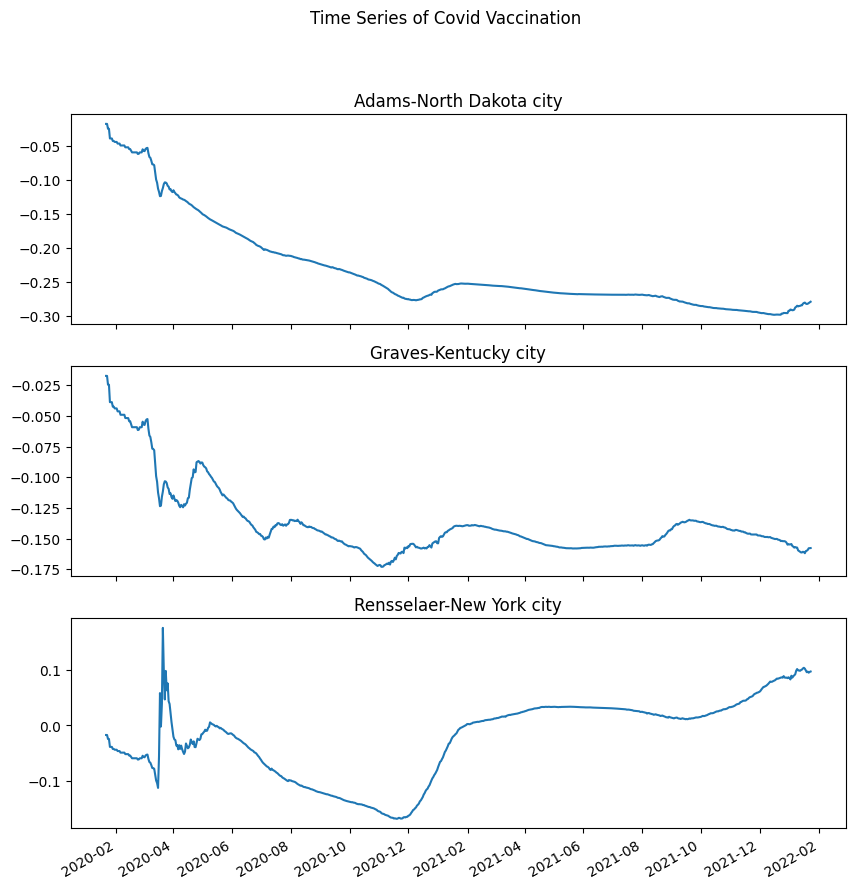

In [5]:
time_series_plot(scaled_cases_raw_df , ['Adams-North Dakota','Graves-Kentucky','Rensselaer-New York'] , plot_dist = False)

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset by superimposing the cumulative explained variance to a scree plot. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? Write an expression for this. **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element). **[0.5]**
6. Compare the first two PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

  * PC1 seems to increase and then stagnate at a value of 0.4 unlike other PCs stagnating at 0. On the other hand PC2 starts at 0, increases and then stagnates at 0 again, unlike other PCS starting at a diff value than 0. but converging to zero eventually.

In [6]:
### YOUR CODE HERE ###

#import libraries
import numpy as np

#compute the covariance matrix
standardized_cases_raw_cov = np.cov(scaled_cases_raw_df.T)
print('The size of the covariance matrix is:' , standardized_cases_raw_cov.shape)


def get_sorted_eigen(cases_raw_cov):
  eigenvalues, eigenvectors = np.linalg.eigh(cases_raw_cov)
  #sorted_eigenvalues = np.sort(eigenvalues)
  #sorted_eigenvectors = np.sort(eigenvectors)

  args = (-eigenvalues).argsort()
  sorted_eigenvalues = eigenvalues[args]
  sorted_eigenvectors = eigenvectors[:, args]

  return  sorted_eigenvalues , sorted_eigenvectors # sorted_eigenvalues[::-1] , sorted_eigenvectors[::-1]


The size of the covariance matrix is: (733, 733)


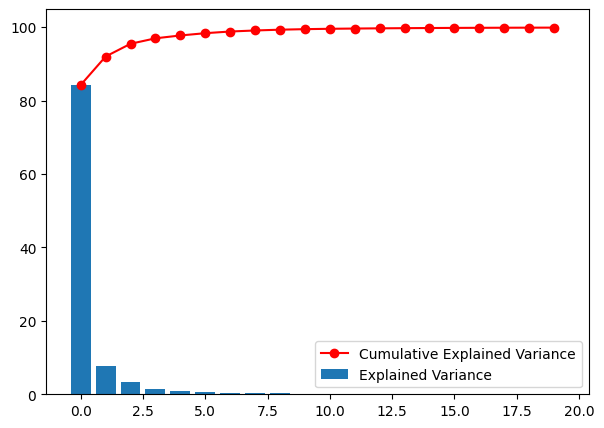



The minimum number of PC to cover 99% of the variance is:  7


In [7]:
sorted_eigenvalues , sorted_eigenvectors = get_sorted_eigen(standardized_cases_raw_cov)

eig_sum  = sum(sorted_eigenvalues)
expVar = [eigV/eig_sum*100 for eigV in sorted_eigenvalues]
cumExpVar = np.cumsum(expVar)

plt.figure(figsize=(7,5))
plt.bar(range(len(cumExpVar[:20])), expVar[:20], label='Explained Variance')
plt.plot(cumExpVar[:20], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

# Number of PCs to cover 99% of the data


def get_number_of_basis(eigenvalues , variance=0.99):

  for i,cumul_sum in enumerate(np.cumsum(eigenvalues) / np.sum(eigenvalues)):
    if cumul_sum>variance:
      return i


print('\n\nThe minimum number of PC to cover 99% of the variance is: ', get_number_of_basis(sorted_eigenvalues , variance=0.99))

In [8]:
pcs_of_interest = sorted_eigenvectors[: , :16]


def plot_pc(dates , data, subplots = True):

  if subplots==True:
    fig, axs = plt.subplots(data.shape[1])
    fig.set_size_inches(data.shape[1],2*data.shape[1])
    date = pd.to_datetime(dates)
    fig.suptitle('Time Series of PCs')

    two_month_locator = mdates.MonthLocator(interval=2)
    year_month_formatter = mdates.DateFormatter("%Y-%m")

    for i in range(data.shape[1]):
      axs[i].xaxis.set_major_locator(two_month_locator)
      axs[i].xaxis.set_major_formatter(year_month_formatter)
      axs[i].plot(date , data[:,i])
      axs[i].set_title(f'PC {i+1}')
      fig.autofmt_xdate()

    if subplots ==False:
      fig, axs = plt.subplots(data.shape[1])
      fig.set_size_inches(data.shape[1],2*data.shape[1])
      date = pd.to_datetime(dates)
      fig.suptitle('Time Series of PCs')

      two_month_locator = mdates.MonthLocator(interval=2)
      year_month_formatter = mdates.DateFormatter("%Y-%m")
      axs.xaxis.set_major_locator(two_month_locator)
      axs.xaxis.set_major_formatter(year_month_formatter)

      for i in range(data.shape[1]):

        axs.plot(date , data[:,i] , legend = f'{i+1} PC(s)')
        fig.autofmt_xdate()

      axs.set_title(f'Reconstruction with {data.shape[1]} components')




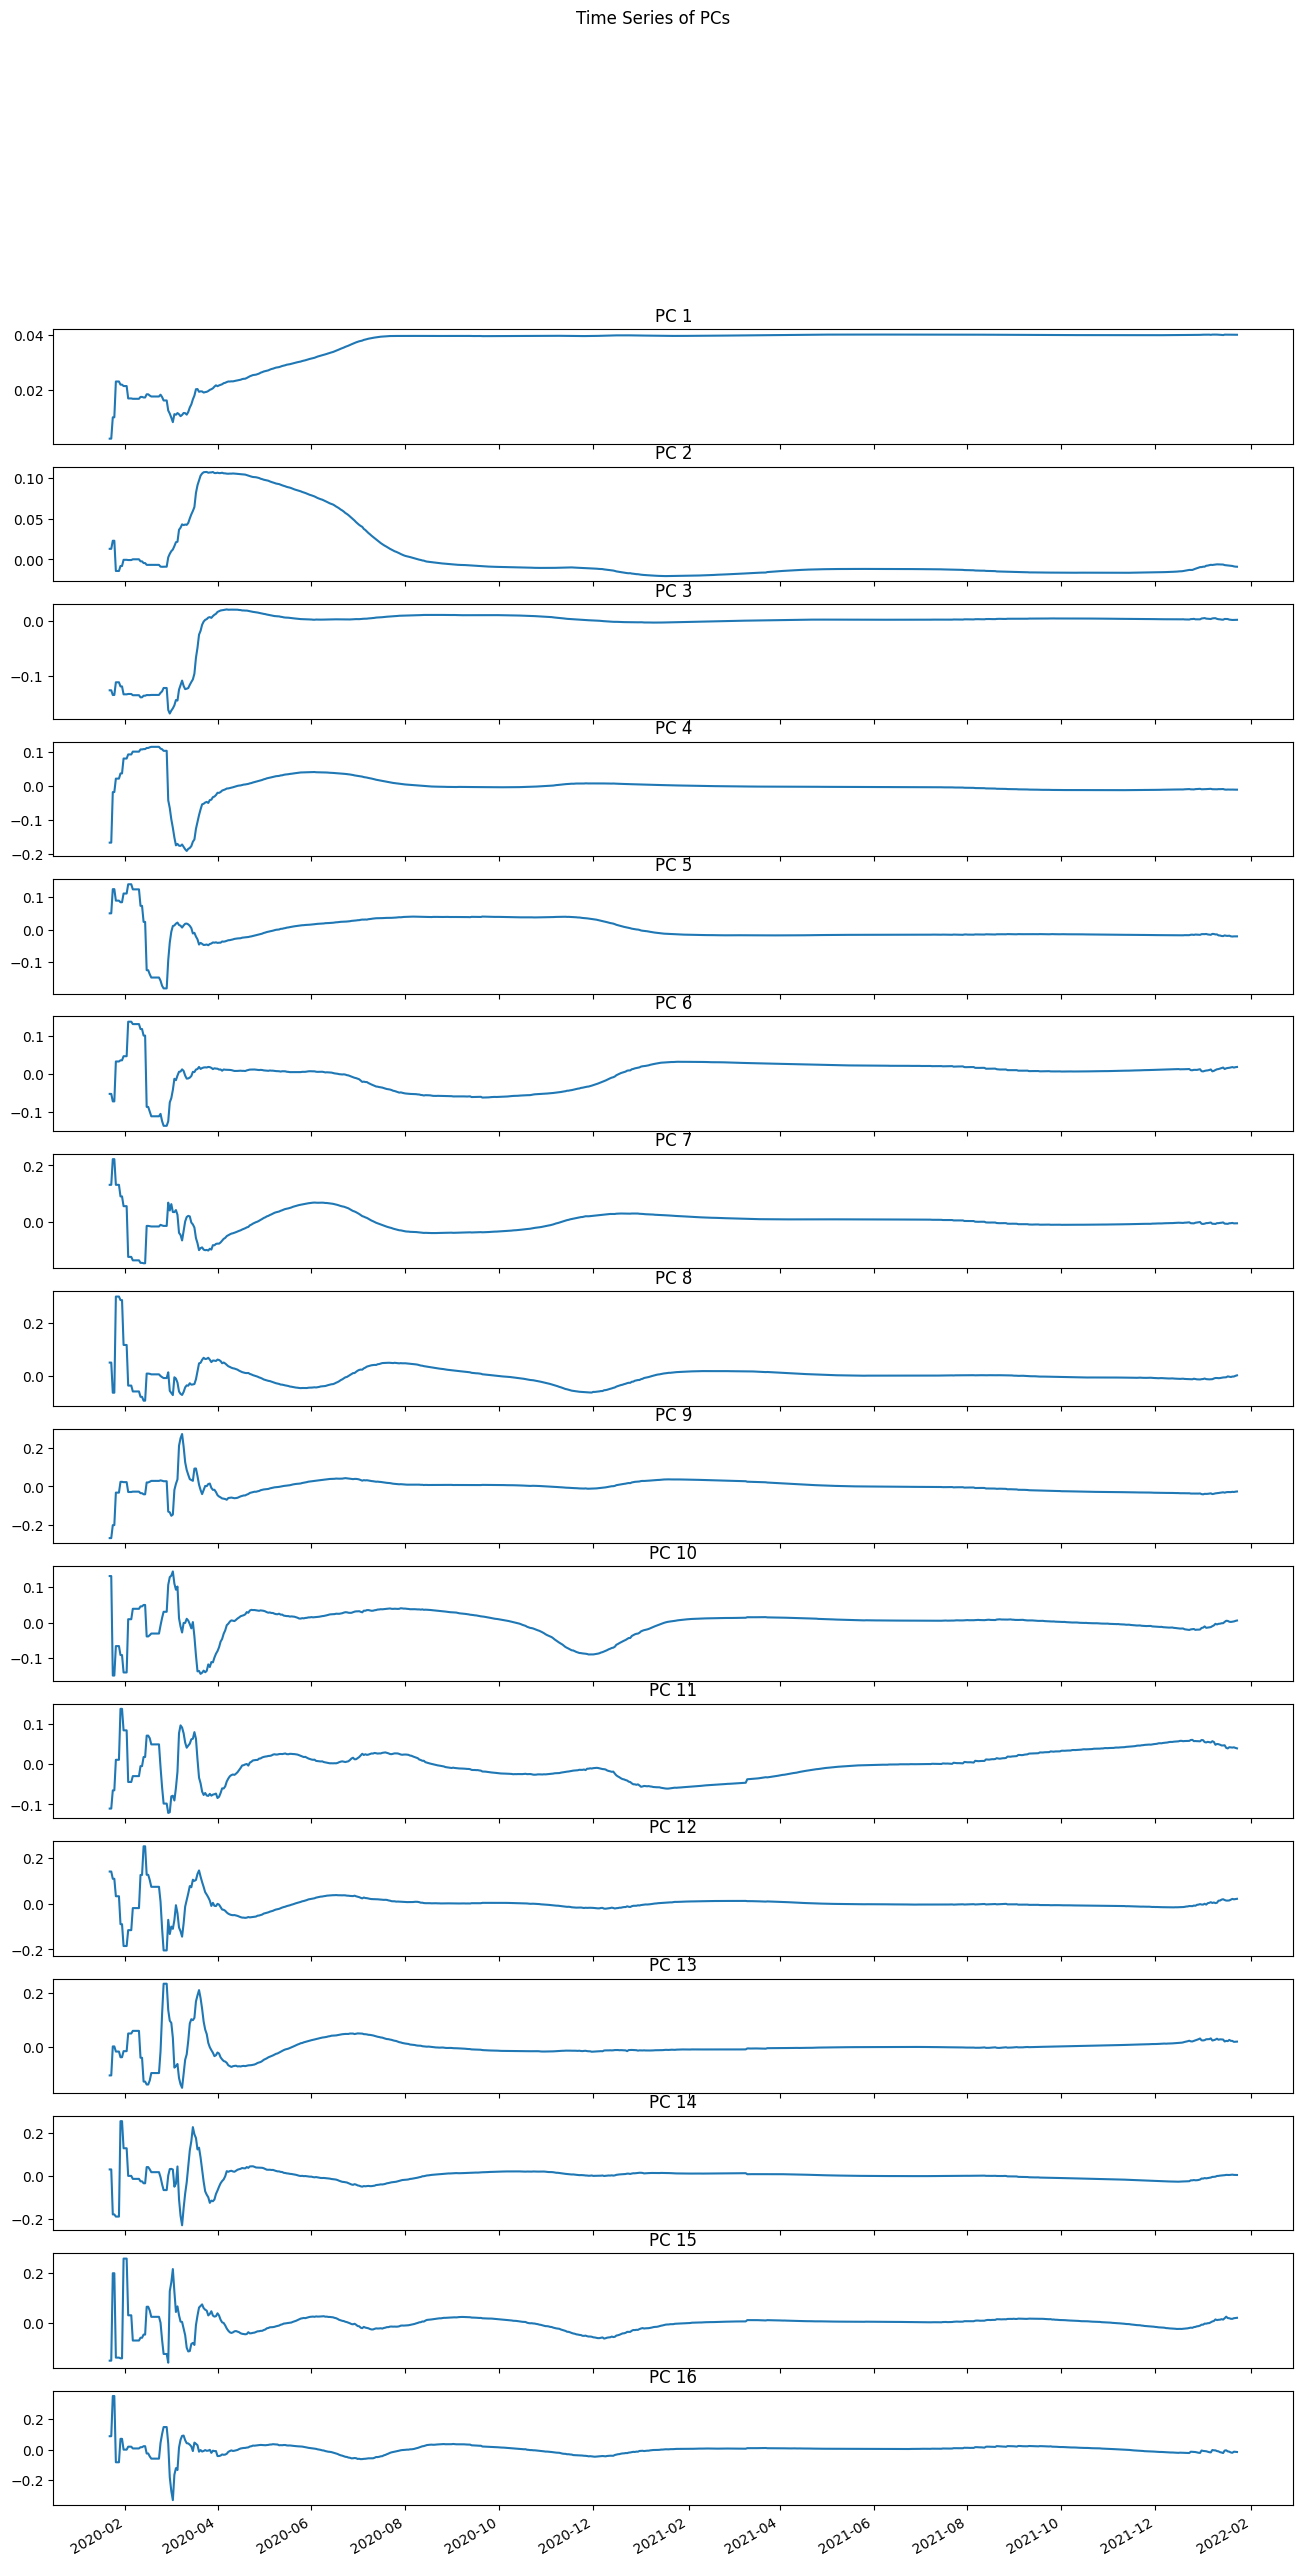

In [9]:
plot_pc(cases_raw.columns , pcs_of_interest , subplots = True)

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a city and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues.
*   Plots 4 figures:
  1.   The original time-series for the specified city. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified city in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable):
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error.
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using `Rensselaer-New York`, `Graves-Kentucky`, and `Adams-North Dakota` as inputs. **[0.5]**


In [10]:
from sklearn.metrics import mean_squared_error


def plot_country_figures(original_df, country_name):
  ### YOUR CODE HERE ###


  scaler_2 = StandardScaler().fit(original_df)
  scaled_df = pd.DataFrame(data = scaler_2.transform(original_df) , columns = original_df.columns)
  scaled_df.index = original_df.index

  eigenvalues , eigenvectors = get_sorted_eigen(np.cov(scaled_df.T))

  city_data = original_df.loc[country_name]
  scaled_city_data = scaled_df.loc[country_name]#scaler_2.transform(city_data)


  time_series_plot(original_df , country_name , plot_dist = False)

  num_of_principal_comp = [1,2,4,8,16]

  fig, axs = plt.subplots()
  fig.set_size_inches(10 , 3.5)
  date = pd.to_datetime(original_df.columns)

  two_month_locator = mdates.MonthLocator(interval=2)
  year_month_formatter = mdates.DateFormatter("%Y-%m")

  axs.xaxis.set_major_locator(two_month_locator)
  axs.xaxis.set_major_formatter(year_month_formatter)
  axs.set_title(f'Recontruction for {country_name[0]} city')

  rmse_list = []
  best_err = np.math.inf
  best_comp = None
  residual = None




  for num_of_basis in num_of_principal_comp:
    temp_eigenValues = eigenvalues[0:num_of_basis].copy()
    temp_eigenVectors = eigenvectors[:, 0:num_of_basis].copy()

    Projection_city = np.dot(scaled_city_data , temp_eigenVectors)
    Recons_city = np.dot(Projection_city, temp_eigenVectors.T)

    R_non_standardized = scaler_2.inverse_transform(Recons_city).flatten()

    axs.plot(date , R_non_standardized, label =f'#PC: {num_of_basis}')
    axs.legend()
    fig.autofmt_xdate()


    err = np.square(np.subtract(np.array(city_data.values) , R_non_standardized)).mean()


    if err<best_err: # note that the best residual error sould be with reconstruction with the most number of PCs but this step only verifies this, and would allow us to know if
                     # something is wrong.

      residual = np.subtract(np.array(city_data.values) , R_non_standardized)
      best_err = err
      best_comp = num_of_basis



  fig, axs = plt.subplots()
  fig.set_size_inches(10 , 3.5)
  axs.plot(date ,residual.reshape((-1,)) , label =f'#PC: {best_comp}')
  axs.set_title(f'Best residual error for {country_name[0]} city')
  axs.legend()
  fig.autofmt_xdate()


  for i in range(1,11):
    temp_eigenValues = eigenvalues[0:i]
    temp_eigenVectors = eigenvectors[:, 0:i]

    Projection_city = np.dot(scaled_city_data , temp_eigenVectors)
    Recons_city = np.dot(Projection_city, temp_eigenVectors.T)

    R_non_standardized_2 = scaler_2.inverse_transform(Recons_city)#.flatten()

    rmse = mean_squared_error(city_data.values , R_non_standardized_2 , squared = False)
    #np.sqrt(np.mean((np.array(city_data.values) - R_non_standardized_2) ** 2))
    rmse_list.append(rmse)



  fig, axs = plt.subplots()
  fig.set_size_inches(10 , 3.5)
  axs.plot(range(1,11) ,rmse_list)
  axs.set_title(f'RMSE for {country_name[0]} city')
  axs.set_xlabel('# PCs')
  axs.set_xticks(range(1,11))
  axs.set_ylabel('RMSE')

  return residual , rmse_list





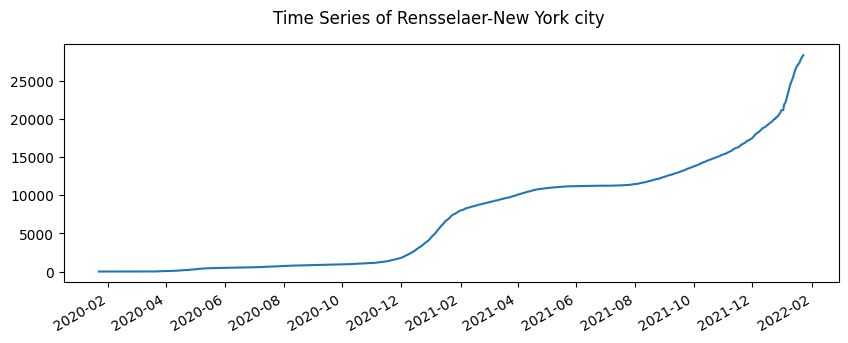

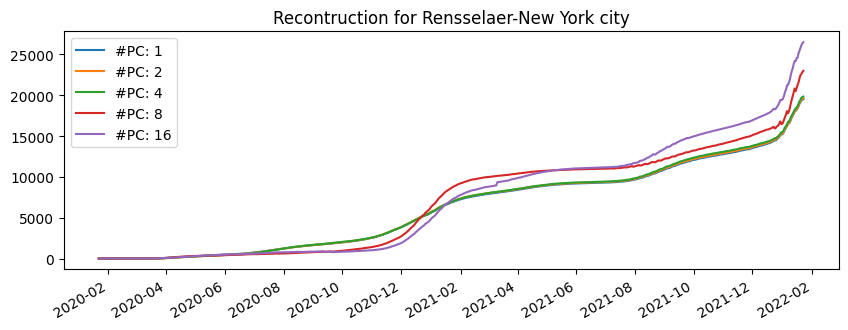

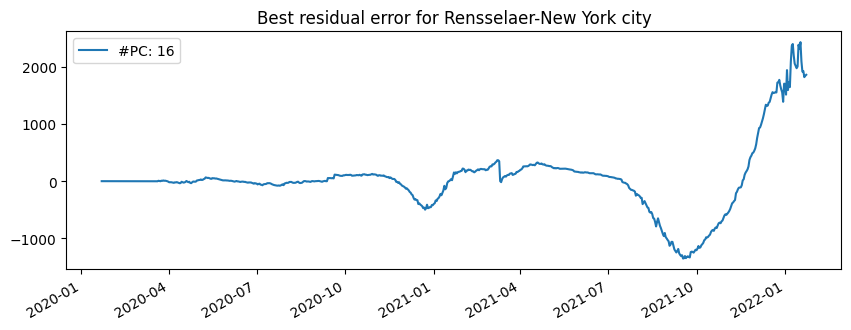

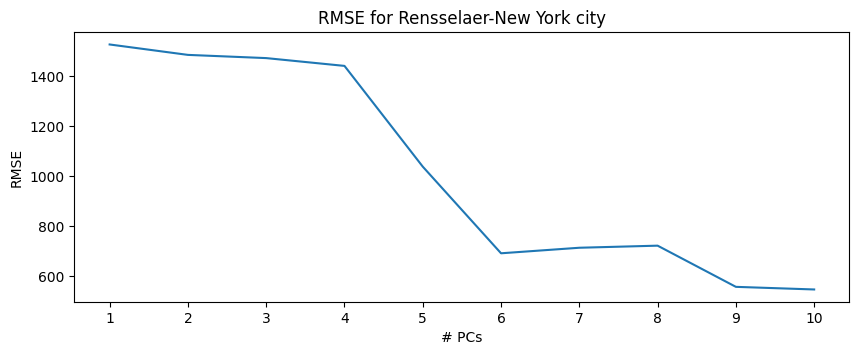

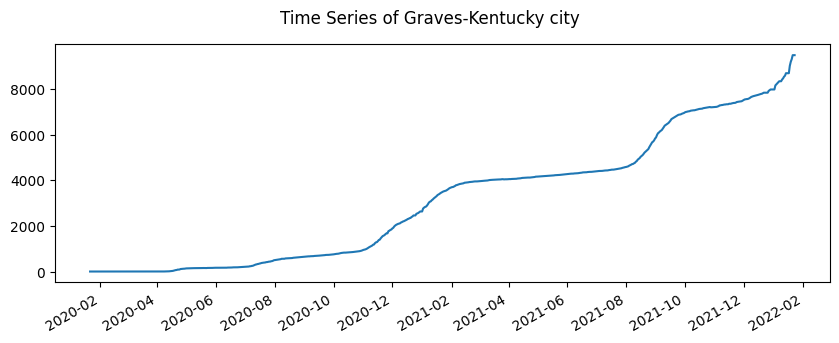

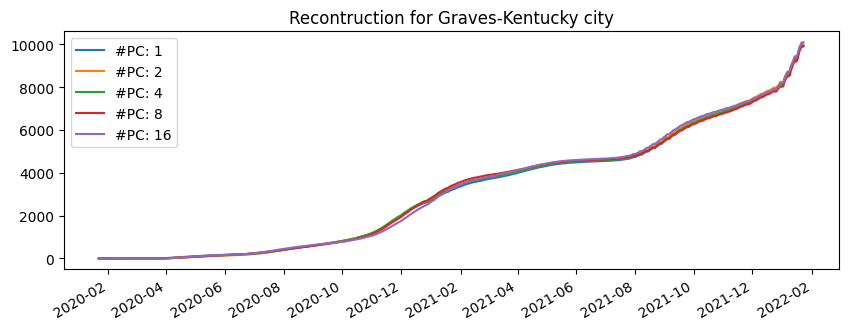

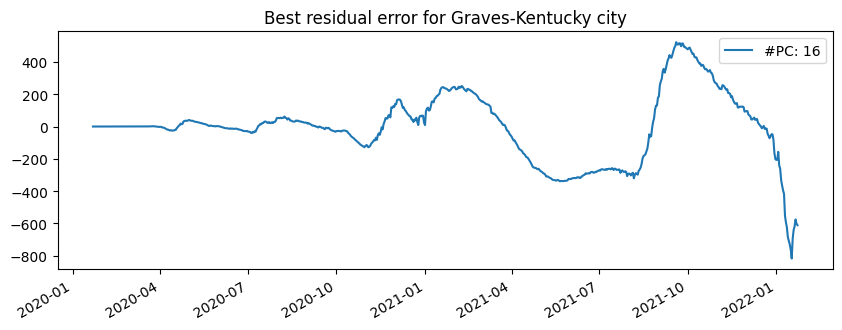

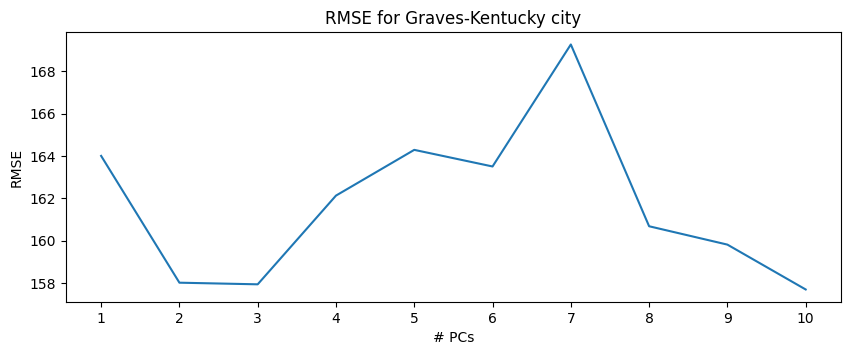

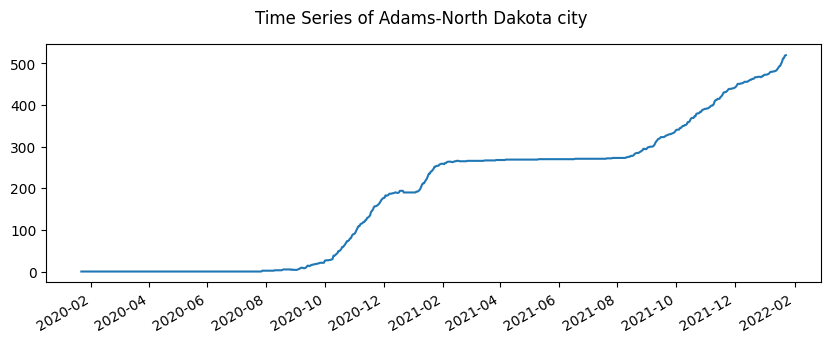

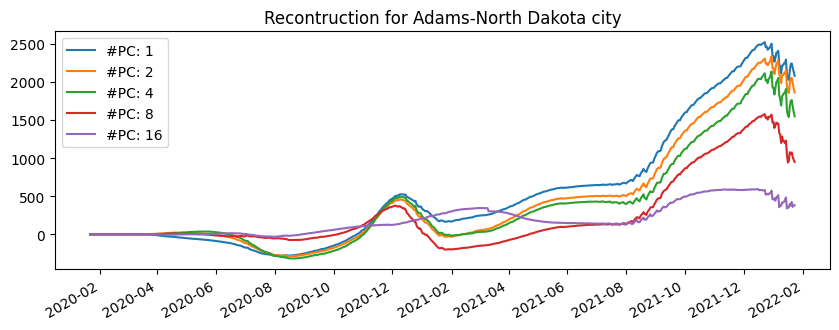

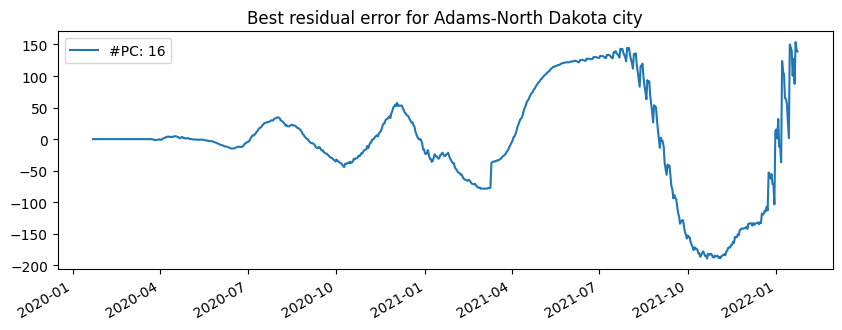

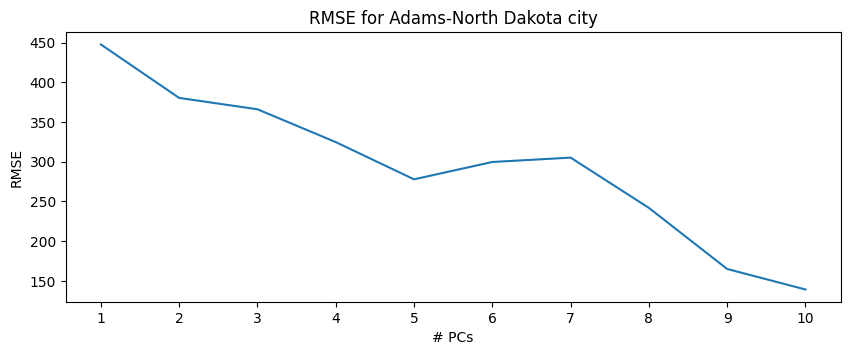

In [11]:
city_list = ['Rensselaer-New York', 'Graves-Kentucky', 'Adams-North Dakota']
residual_pca_list = []
rmse_pca = []

for city in city_list:
  residual , rmse_list_pca = plot_country_figures(cases_raw, [city])
  residual_pca_list.append(residual)
  rmse_pca.append(rmse_list_pca)

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. Write a function to make this comparison **[0.5]**, and comment on the results. **[0.5]**.

  * In this part I chose to adopt the approach of using the TruncatedSVD library from sklearn. However, if we were to hard code the SVD method we would not have to compute the covariance, we can get the eigenvalues, take their square root and place them in a diagonal matrix for the sigma matrix.

  For the U and V matrices, we find the eigenvectors of A(A.T) and build matrix U. Then find the eigenvectors of (A.T)A and build matrix V.


  * In terms of the results, I was expecting to find different but close values of RMSE error however I could not find the bug that was leading to the same RMSE of both reconstructed datapoint through SVD and PCA.

In [12]:
### YOUR CODE HERE ###

from sklearn.decomposition import TruncatedSVD
import warnings


def plot_city_SVD(original_df, country_name):


  scaler = StandardScaler().fit(original_df)
  scaled_df = pd.DataFrame(data = scaler.transform(original_df) , columns = original_df.columns)
  scaled_df.index = original_df.index

  eigenvalues , eigenvectors = get_sorted_eigen(np.cov(scaled_df.T))


  city_data = original_df.loc[country_name]
  scaled_city_data = scaled_df.loc[country_name] #.transform(city_data)


  time_series_plot(original_df , country_name , plot_dist = False)


  num_of_principal_comp = [1,2,4,8,16]

  fig, axs = plt.subplots()
  fig.set_size_inches(10 , 3.5)
  date = pd.to_datetime(original_df.columns)

  two_month_locator = mdates.MonthLocator(interval=2)
  year_month_formatter = mdates.DateFormatter("%Y-%m")

  axs.xaxis.set_major_locator(two_month_locator)
  axs.xaxis.set_major_formatter(year_month_formatter)
  axs.set_title(f'Recontruction for {country_name[0]} city')

  rmse_list = []
  best_err = np.math.inf
  best_comp = None
  residual = None


  for num_of_basis in num_of_principal_comp:



    svd = TruncatedSVD(n_components=num_of_basis)
    df_fit = svd.fit(scaled_df)
    city_transformed = svd.transform(scaled_city_data)

    Reconstruction = scaler.inverse_transform(svd.inverse_transform(city_transformed))

    axs.plot(date , Reconstruction.reshape(date.shape), label =f'#PC: {num_of_basis}')
    axs.legend()
    fig.autofmt_xdate()

    err = np.subtract(np.array(original_df.loc[country_name].values) , Reconstruction).mean()

    #err = np.square(np.subtract(np.array(city_data.values) , Reconstruction)).mean()

    if err<best_err: # note that the best residual error sould be with reconstruction with the most number of PCs but this step only verifies this, and would allow us to know if
                     # something is wrong.

      residual = np.subtract(np.array(city_data.values) , Reconstruction)
      best_err = err
      best_comp = num_of_basis


  fig, axs = plt.subplots()
  fig.set_size_inches(10 , 3.5)
  axs.plot(date ,residual.reshape(date.shape) , label =f'#PC: {best_comp}')
  axs.set_title(f'Best residual error for {country_name[0]} city')
  axs.legend()
  fig.autofmt_xdate()

  for i in range(1,11):

    svd = TruncatedSVD(n_components=i)
    df_fit = svd.fit(scaled_df)
    city_transformed = svd.transform(scaled_city_data)

    Reconstruction = scaler.inverse_transform(svd.inverse_transform(city_transformed))

    rmse = mean_squared_error(city_data.values , Reconstruction.reshape(city_data.shape) , squared = False)

    #np.sqrt(np.mean((np.array(city_data.values) - Reconstruction) ** 2))
    rmse_list.append(rmse)



  fig, axs = plt.subplots()
  fig.set_size_inches(10 , 3.5)
  axs.plot(range(1,11) ,rmse_list)
  axs.set_title(f'RMSE for {country_name[0]} city')
  axs.set_xlabel('# PCs')
  axs.set_xticks(range(1,11))
  axs.set_ylabel('RMSE')

  return residual , rmse_list



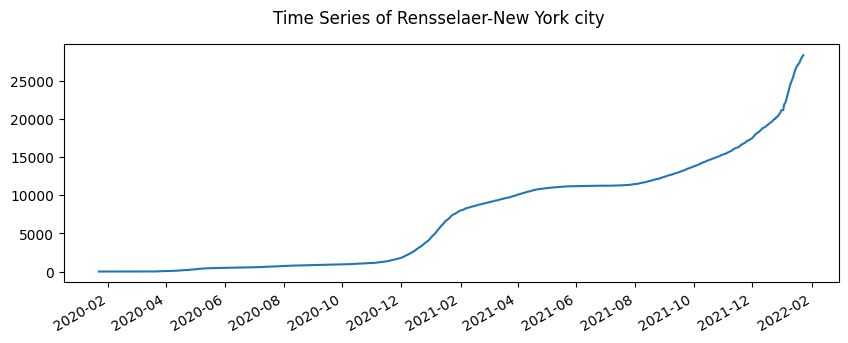

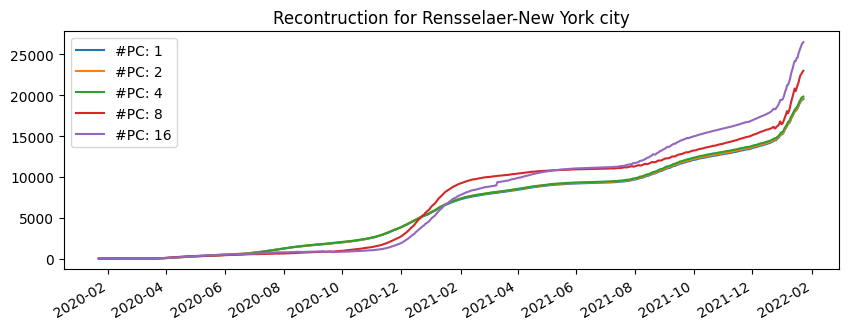

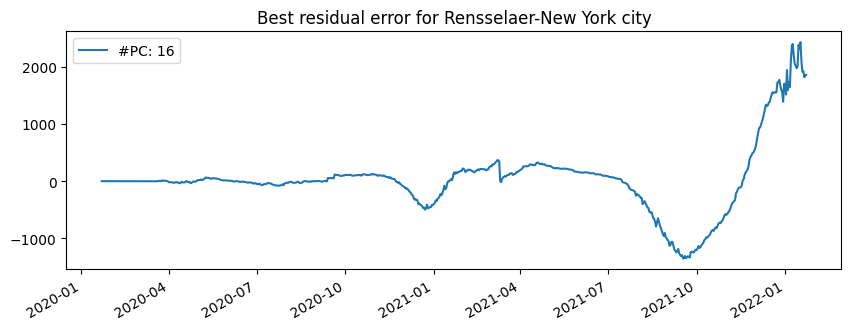

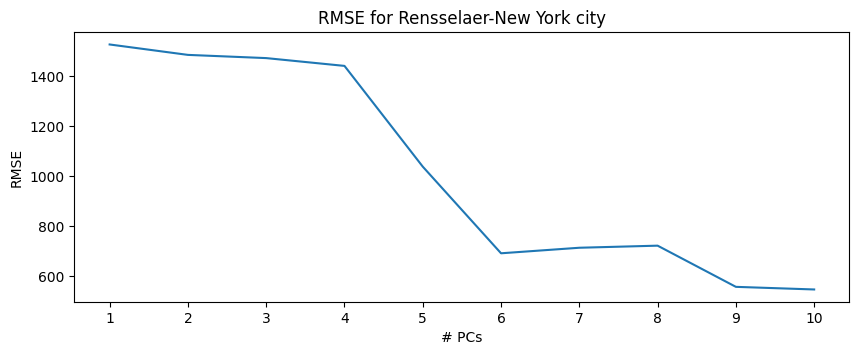

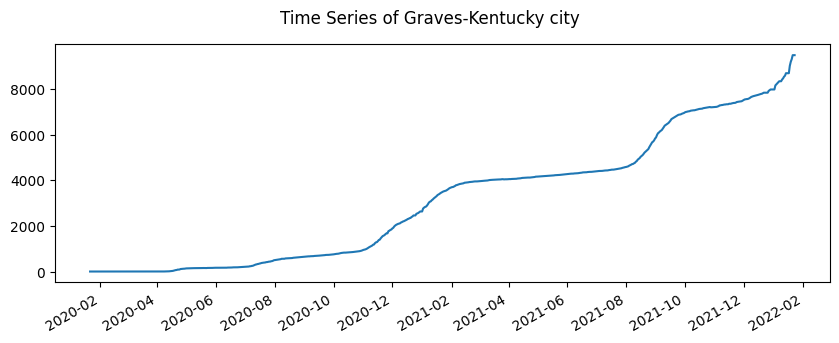

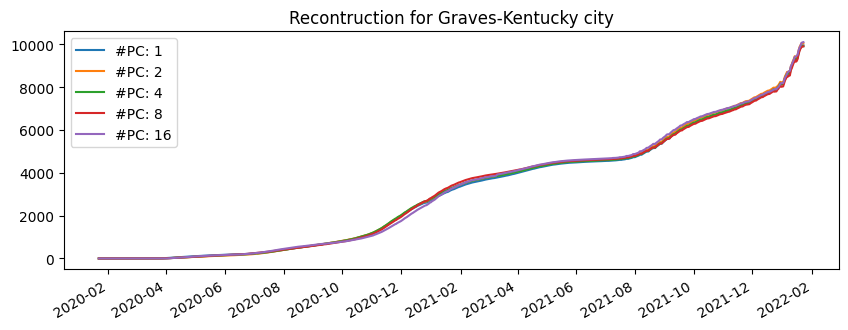

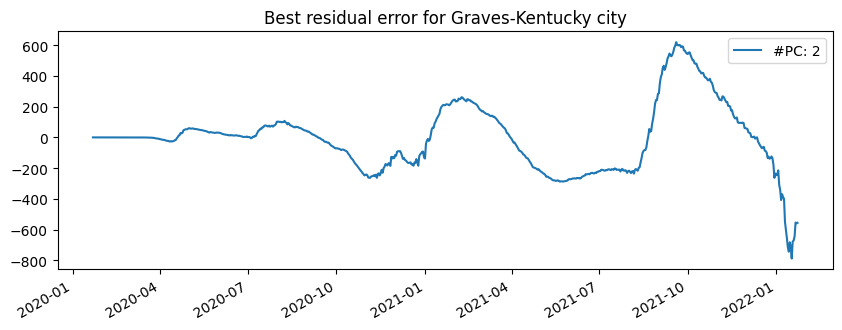

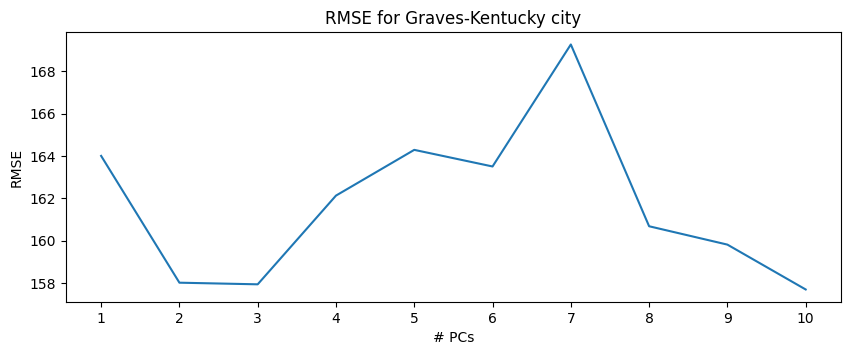

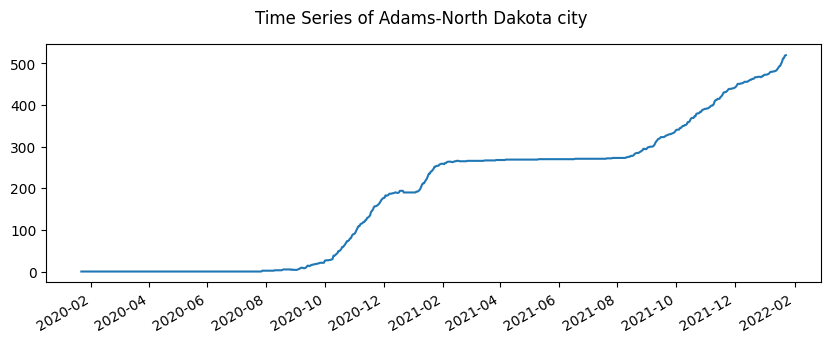

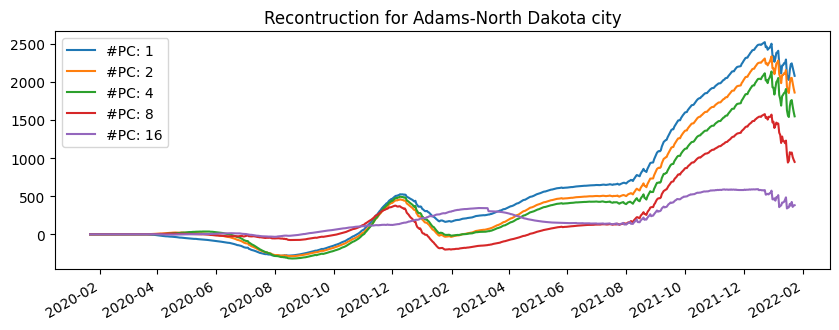

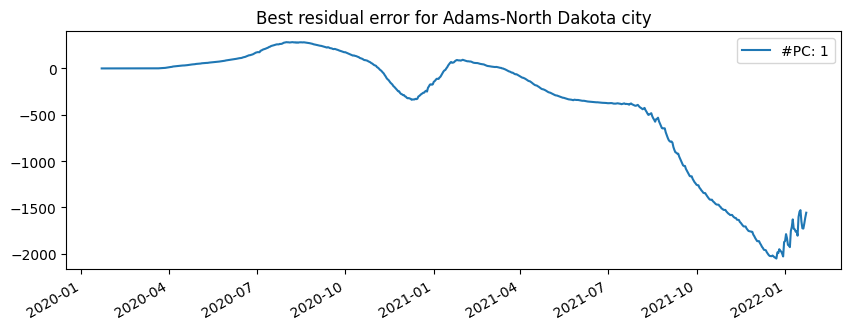

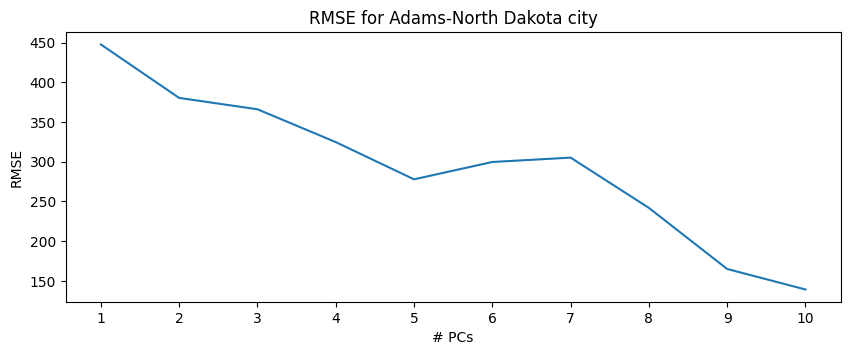

In [13]:
city_list = ['Rensselaer-New York', 'Graves-Kentucky', 'Adams-North Dakota']
residual_SVD_list = []
rmse_SVD = []

for city in city_list:
  residual_SVD , rmse_list_SVD = plot_city_SVD(cases_raw, [city] )
  residual_SVD_list.append(residual_SVD)
  rmse_SVD.append(rmse_list_SVD)

In [14]:
date = pd.to_datetime(cases_raw.columns)


def compare_pca_svd(residual_SVD_list , rmse_SVD ,residual_pca_list , rmse_pca,city_list):


  for i,city in enumerate(city_list):

    fig, axs = plt.subplots()
    fig.set_size_inches(10 , 3.5)

    two_month_locator = mdates.MonthLocator(interval=2)
    year_month_formatter = mdates.DateFormatter("%Y-%m")

    axs.xaxis.set_major_locator(two_month_locator)
    axs.xaxis.set_major_formatter(year_month_formatter)


    axs.plot(date ,residual_pca_list[i][:].reshape(date.shape) , label ='PCA residual')
    axs.plot(date , residual_SVD_list[i][:].reshape(date.shape) ,label = 'SVD residual')
    axs.set_title(f'Residual comparison for {city} city')
    axs.legend()
    fig.autofmt_xdate()



  for i,city in enumerate(city_list):

    fig, axs = plt.subplots()
    fig.set_size_inches(10 , 3.5)

    axs.plot(range(len(rmse_pca[i])) , rmse_pca[i] , label = 'PCA RMSE')
    axs.plot(range(len(rmse_SVD[i])) , rmse_SVD[i] , label = 'SVD RMSE')
    axs.set_title(f'RMSE comparison for {city} city')
    axs.legend()



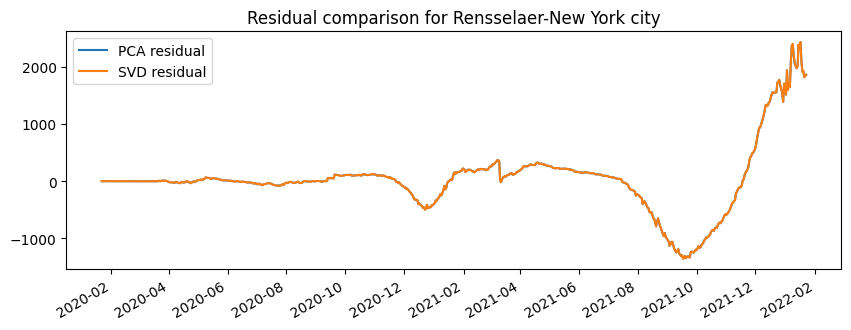

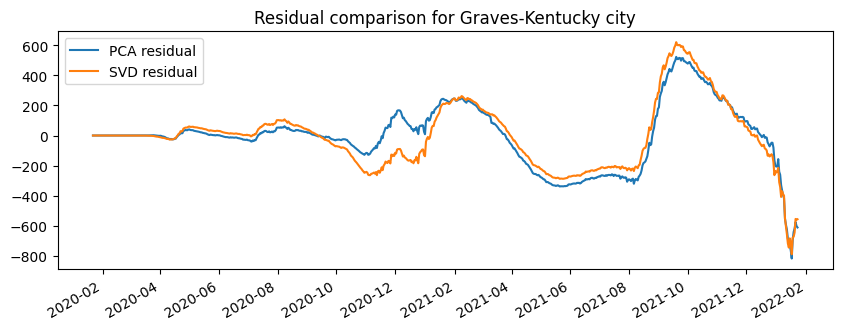

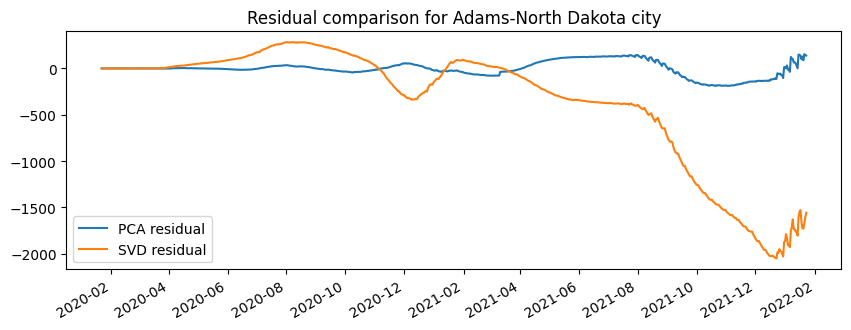

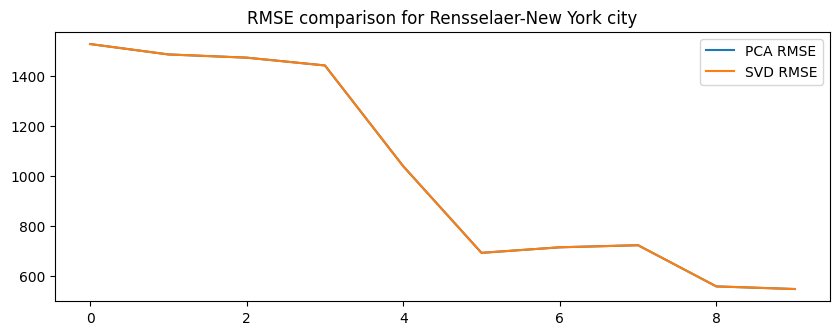

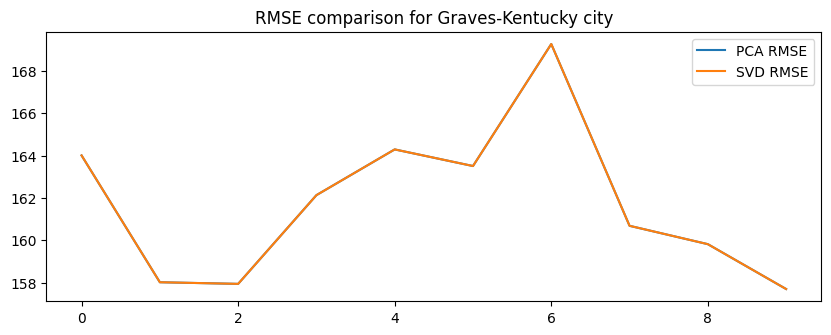

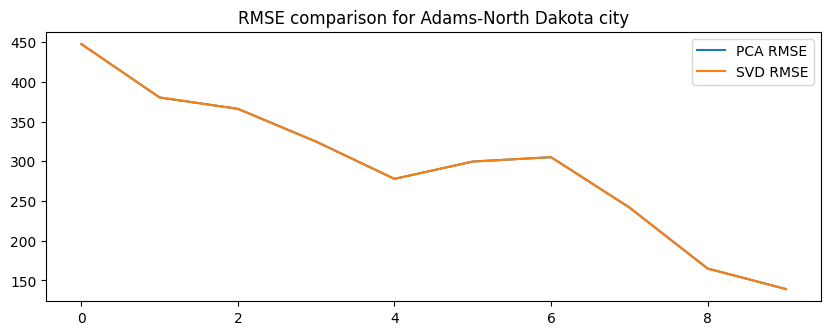

In [15]:
compare_pca_svd(residual_SVD_list , rmse_SVD ,residual_pca_list , rmse_pca,city_list)

# Part 5: Let's collect another dataset! [2 Marks]
Create another dataset similar to the one used in the beginning of the project, but use the raw information on COVID deaths (not vaccinations) provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format (i.e., the same format that was in previous parts). You are free to use any tools you like, from Excel to Python!

In the end, you should have a new CSV file with more dates (features) compared to the provided dataset.


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4 (without comparing to PCA). When analyzing Canada, you may use just Ontario. For China, you may use Beijing. **[1]**

Don't forget to add your new CSV file to Quercus for reference. The code below helps you to upload your new CSV file to your colab session.

In [16]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving time-series-19-covid-combined_csv.csv to time-series-19-covid-combined_csv.csv


In [17]:
### YOUR CODE HERE ###
covid_data = pd.read_csv("time-series-19-covid-combined_csv.csv")
covid_data = covid_data.pivot(index=['Country/Region', 'Province/State'], columns="Date", values="Deaths")
covid_data.to_csv("formatted_covid_data.csv")


In [18]:
canada_data = covid_data.loc[('Canada')]
canada_data.head()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Province/State,,,,,,,,,,,,,,,,,,,,,
Alberta,0,0,0,0,0,0,0,0,0,0,...,3380,3380,3380,3403,3412,3413,3421,3429,3429,3429
British Columbia,0,0,0,0,0,0,0,0,0,0,...,2468,2468,2468,2490,2492,2505,2520,2529,2529,2529
Diamond Princess,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Grand Princess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Manitoba,0,0,0,0,0,0,0,0,0,0,...,1443,1443,1443,1463,1466,1478,1485,1492,1492,1492


In [19]:
China_data = covid_data.loc[('China')]
China_data.head()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Province/State,,,,,,,,,,,,,,,,,,,,,
Anhui,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Beijing,0,0,0,0,0,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9
Chongqing,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Fujian,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Gansu,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


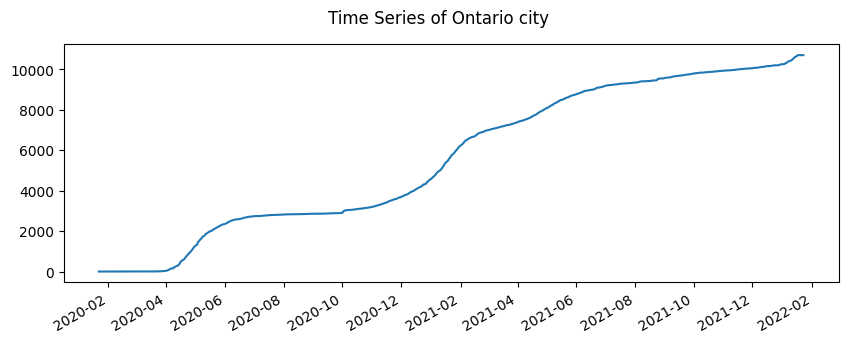

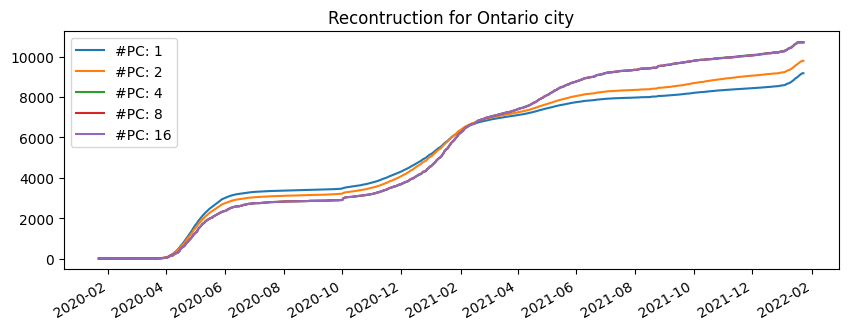

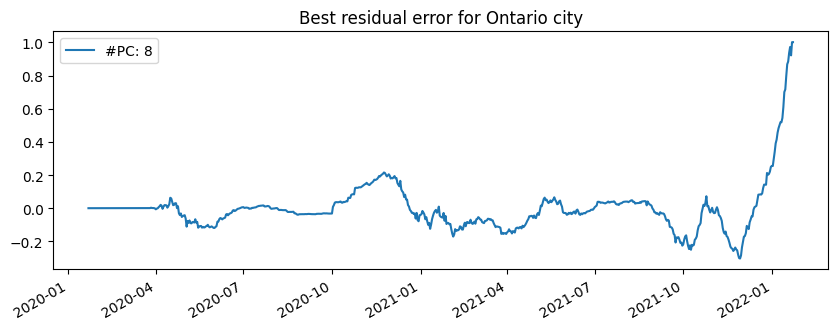

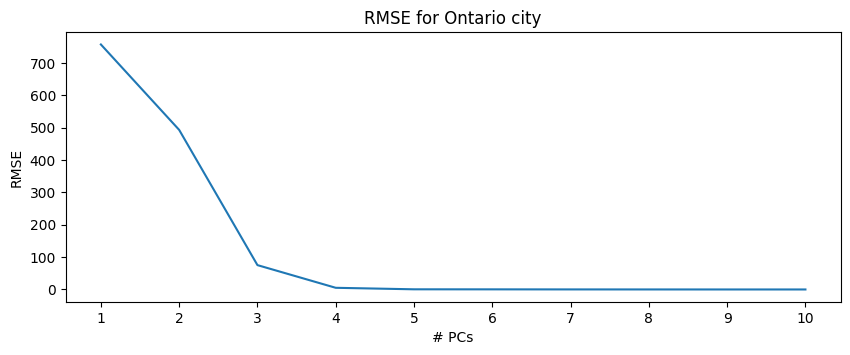

In [20]:
residual_canada , rmse_list_canada = plot_city_SVD(canada_data, ['Ontario'])

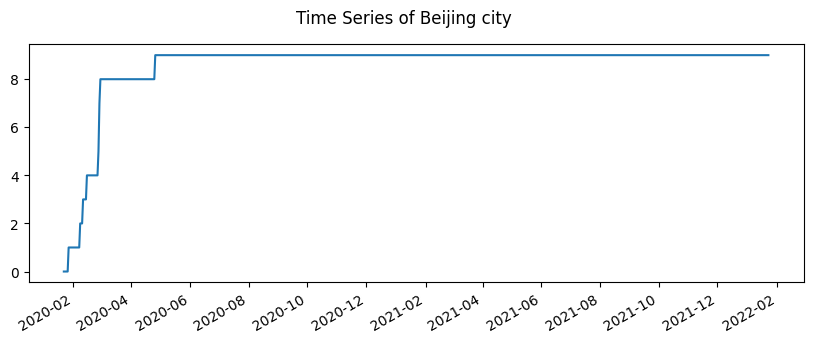

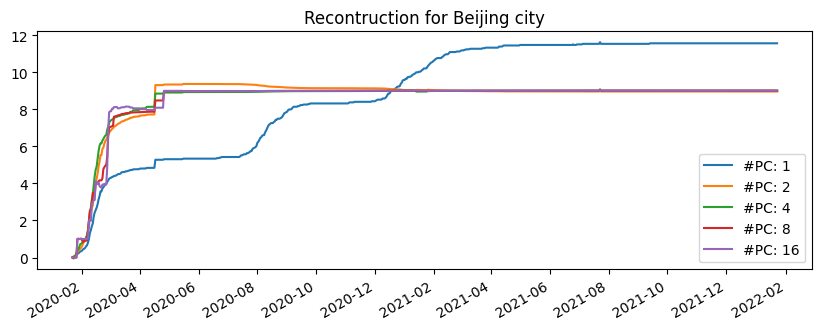

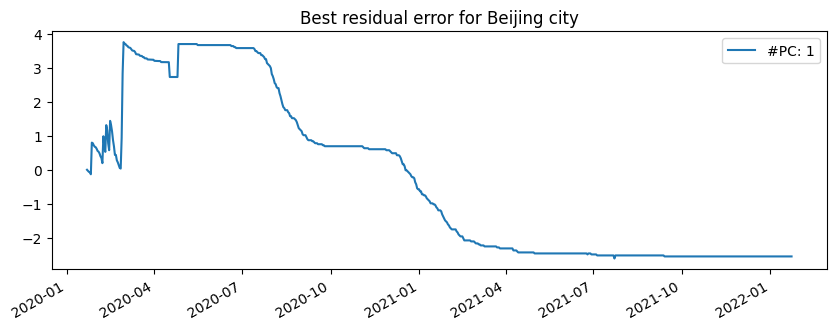

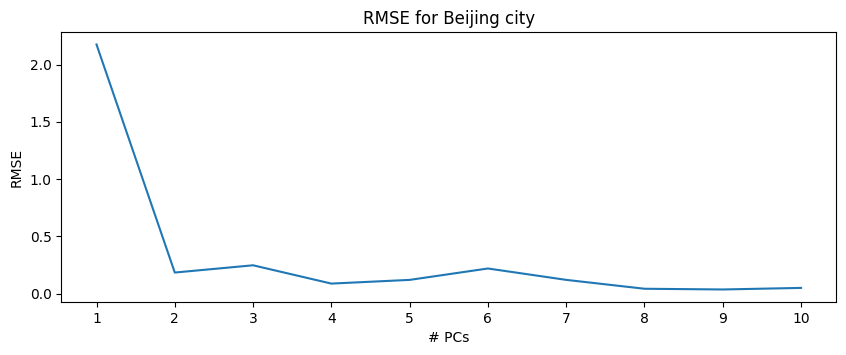

In [21]:
residual_china , rmse_list_china = plot_city_SVD(China_data, ['Beijing'])

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

